In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

In [2]:
conda list

# packages in environment at C:\Users\hp\anaconda3\envs\vedeep:
Note: you may need to restart the kernel to use updated packages.

#
# Name                    Version                   Build  Channel
absl-py                   2.1.0                    pypi_0    pypi
anyio                     4.6.2            py39haa95532_0  
archspec                  0.2.3              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h827c3e9_1  
asttokens                 2.0.5              pyhd3eb1b0_0  
astunparse                1.6.3                    pypi_0    pypi
async-lru                 2.0.4            py39haa95532_0  
attrs                     24.3.0           py39haa95532_0  
babel                     2.11.0           py39haa95532_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.12.3           py39haa95532_0  
blas                      1.0                         mkl  
bleach  

In [6]:
!pip install Pydot==2.0.0

In [7]:
# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [9]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [10]:
!pip install scikeras

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.1 MB 10.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.1 MB 9.4 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 9.5 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 9.5 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 8.9 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   - -------------------------------------- 2.1/46.2 MB 9.8 MB/s eta 0:00:05
   --- ------------------------------------ 4.2/46.2 MB 10.1 MB/s eta 0:00:05
   ----- ---------------------------------- 6.3/46.2 MB 

In [11]:
from scikeras.wrappers import KerasClassifier

In [12]:
#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [13]:
# Digit MNIST dataset
(X_train_digit, Y_train_digit), (X_test_digit, Y_test_digit) = mnist.load_data()

In [14]:
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
Y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

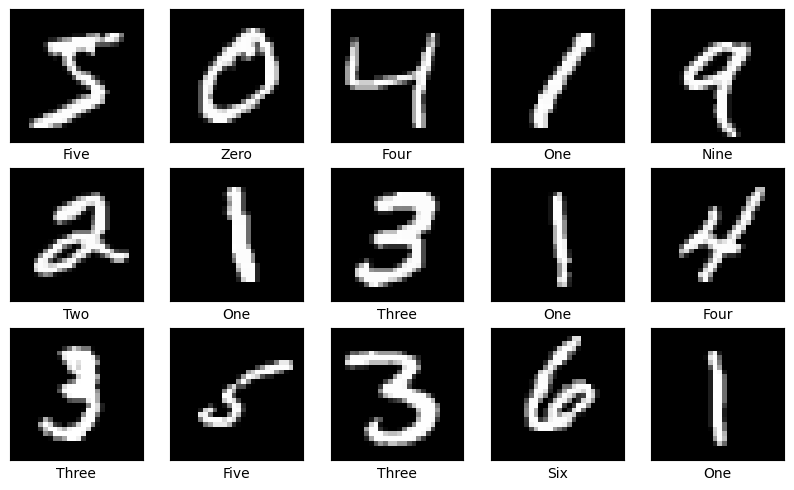

In [16]:
# Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

# Visualizing the digits

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[Y_train_digit[i]])
plt.show()

In [17]:
X_train_digit.shape

(60000, 28, 28)

In [18]:
X_train_digit = X_train_digit.reshape(60000,784)
X_test_digit = X_test_digit.reshape(10000,784)

In [19]:
X_train_digit.shape

(60000, 784)

In [20]:
X_test_digit.shape

(10000, 784)

In [21]:
# Encoding Digit MNIST Labels

Y_train_digit = to_categorical(Y_train_digit, num_classes=10)

Y_test_digit = to_categorical(Y_test_digit, num_classes=10)

In [22]:
Y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
# Creating Base NEURAL NETWORK

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

C:\Users\hp\anaconda3\envs\vedeep\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [26]:
history=model.fit(X_train_digit, Y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, Y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7730 - loss: 3.3950 - val_accuracy: 0.9227 - val_loss: 0.3318
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9351 - loss: 0.2527 - val_accuracy: 0.9426 - val_loss: 0.2239
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9550 - loss: 0.1605 - val_accuracy: 0.9485 - val_loss: 0.2045
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9629 - loss: 0.1265 - val_accuracy: 0.9510 - val_loss: 0.1944
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9690 - loss: 0.1067 - val_accuracy: 0.9595 - val_loss: 0.1557
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9736 - loss: 0.0960 - val_accuracy: 0.9524 - val_loss: 0.2174
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9720 - loss: 0.0929 - val_accuracy: 0.9669 - val_loss: 0.1422
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9802 - loss: 0.0687 - val_accuracy: 0.

In [27]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [29]:
y_predict[0]

array([2.0332935e-09, 9.9818349e-01, 8.7757818e-02, 2.8838137e-01,
       1.0410585e-05, 3.1647353e-06, 6.2481632e-07, 9.9999726e-01,
       6.9669881e-03, 8.4325469e-01], dtype=float32)

In [30]:
# Here we get the index of maximum value in the encoded vector

y_predicts=np.argmax(y_predict, axis=1)

In [31]:
y_predicts

array([7, 2, 1, ..., 4, 5, 5], dtype=int64)

In [32]:
Y_test_digit_eval=np.argmax(Y_test_digit, axis=1)

In [33]:
Y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [34]:
import matplotlib.pyplot as plt

In [35]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [36]:
import seaborn as sns

In [37]:
sns.set_palette("deep")

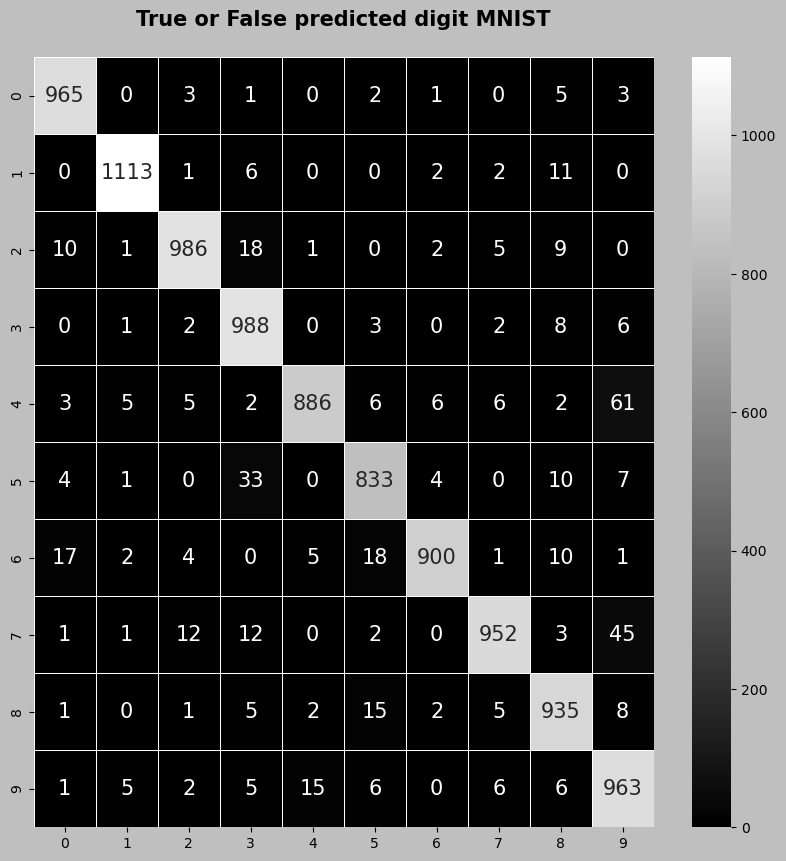

In [38]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(Y_test_digit_eval,y_predicts)
plt.style.use('grayscale')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [39]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.92      0.98      0.95      1010
           4       0.97      0.90      0.94       982
           5       0.94      0.93      0.94       892
           6       0.98      0.94      0.96       958
           7       0.97      0.93      0.95      1028
           8       0.94      0.96      0.95       974
           9       0.88      0.95      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



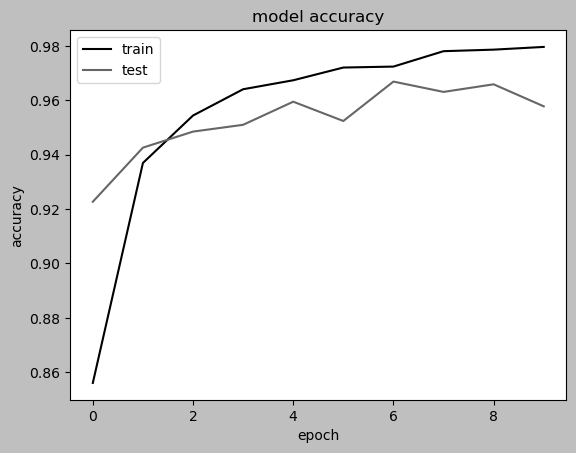

In [40]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


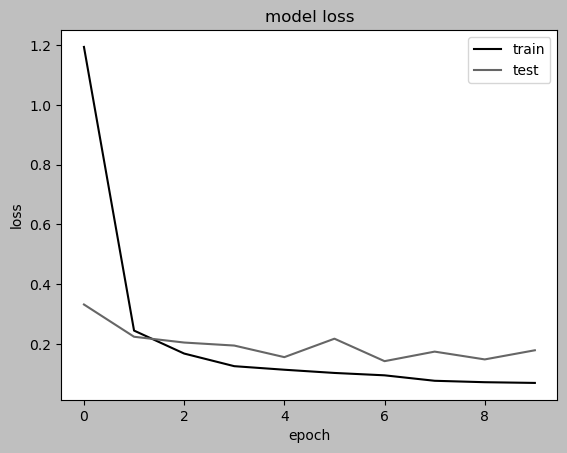

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [42]:
# tf.extend_dims(X_test_digit[0])

y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) 
# Here we get the index of maximum value in the encoded vector
Y_test_digit_eval=np.argmax(Y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


In [43]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

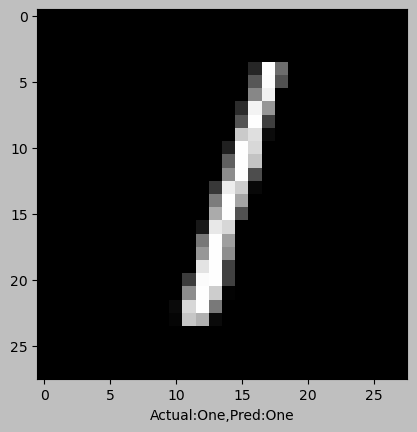

In [44]:
#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(Y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()


In [ ]:
#END ---- both predict and actual same.